In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rc('font',family='Arial')
scatter_kwargs = {"zorder":100}
error_kwargs = {"lw":.5, "zorder":0}

In [2]:
beb = pd.read_csv('beb_results_final.csv')
ppm = pd.read_csv('Kepler_phoprecision.txt',sep='\t',header=0)

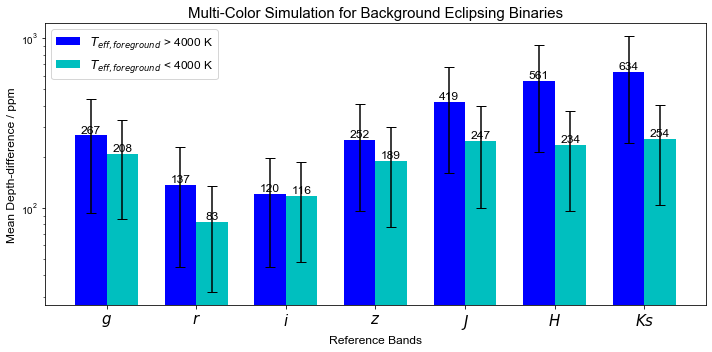

In [94]:
import numpy as np
import matplotlib.pyplot as plt

N = 7
band = ['g','r','i','z','J','H','K']
hot = beb[beb.Teff>4000]
cold = beb[beb.Teff<4000]
band_official = ['$g$','$r$','$i$','$z$','$J$','$H$','$Ks$']


diff_hot = [hot['beb_{}_med'.format(b)].mean() for b in band] 
diff_cold = [cold['beb_{}_med'.format(b)].mean() for b in band] 

diff_hot_err = [hot['beb_{}_qua'.format(b)].mean() for b in band] 
diff_cold_err = [cold['beb_{}_qua'.format(b)].mean() for b in band] 


ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(figsize=[10,5])
rects1 = ax.bar(ind, diff_hot, width, color='b',yerr = diff_hot_err,capsize = 5)

rects2 = ax.bar(ind + width, diff_cold, width, color='c',yerr = diff_cold_err,capsize = 5)

# add some text for labels, title and axes ticks
ax.set_ylabel('Mean Depth-difference / ppm',fontsize=12)
ax.set_xlabel('Reference Bands',fontsize=12)
ax.set_title('Multi-Color Simulation for Background Eclipsing Binaries',fontsize=15)

ax.set_xticks(ind + width / 2)
ax.set_xticklabels(band_official,fontsize=15)
ax.legend((rects1[0], rects2[0]), ('$T_{eff, foreground}$ > 4000 K', '$T_{eff, foreground}$ < 4000 K'),fontsize=12,loc='upper left')
ax.set_yscale('log')

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                '%d' % int(height),
                ha='center', va='bottom',fontsize=12)

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
fig.savefig('BEB_band_diff.pdf',dpi=300,bbox_tight=True)



/Users/neptune/opt/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:6717: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


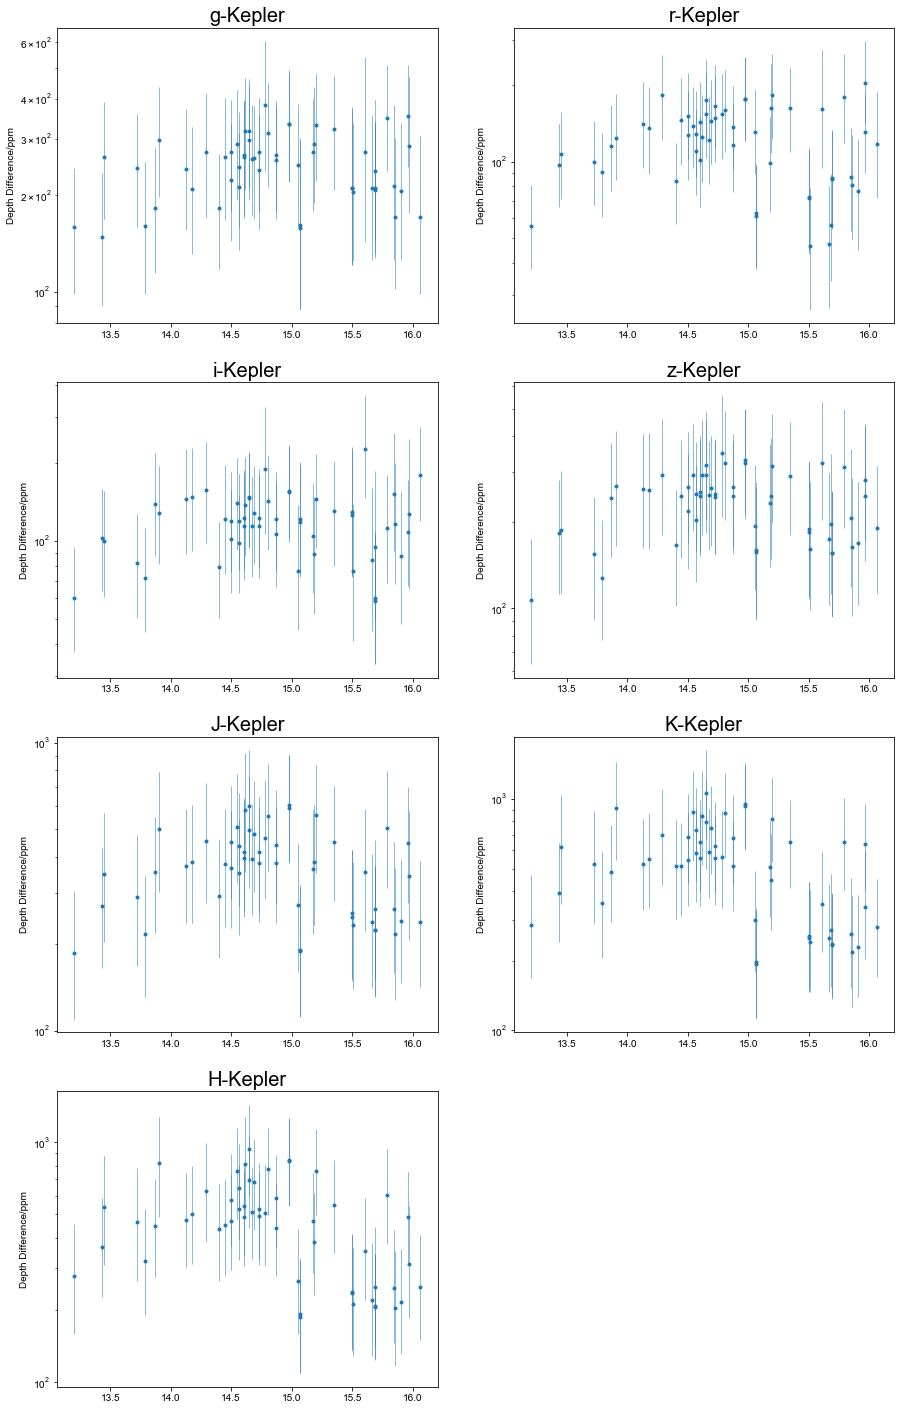

In [13]:
plt.figure(figsize=[15,25])
for inx, band in enumerate(['g','r','i','z','J','K','H']):
    plt.subplot(4,2,inx+1)
    
    qua = beb['beb_'+band+'_qua'].values
    med = beb['beb_'+band+'_med'].values
    tqua = beb['beb_'+band+'_tqua'].values
    
    y_err = np.array((med-qua,tqua-med))
    plt.errorbar(x=beb.Kepler_mag,y=med,yerr=y_err,fmt='.',**error_kwargs)
    #plt.scatter(beb.Kepler_mag,med,marker='.',c=beb.Teff)
    plt.yscale('log')
    #plt.colorbar()
    plt.title(band+'-Kepler',size =20 )
    plt.ylabel('Depth Difference/ppm')
    for i in range(len(beb)):
        plt.axvline(x=beb.Kepler_mag.values[i],ymax=tqua[i],ymin=qua[i],alpha=0.3)

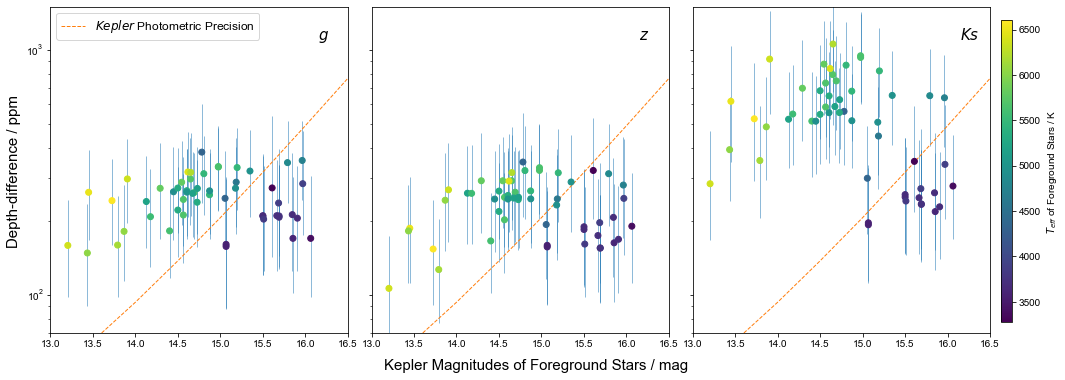

In [98]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(15,6),sharex=True, sharey=True)
band = ['g','z','K']
band_official = ['g','z','Ks']

scatter_kwargs = {"zorder":100}
error_kwargs = {"lw":.5, "zorder":0}

x = beb.Kepler_mag
color = beb.Teff
    

for ind,ax in enumerate(axes.flat):
    b = band[ind]
    qua = beb['beb_'+b+'_qua'].values
    med = beb['beb_'+b+'_med'].values
    tqua = beb['beb_'+b+'_tqua'].values
    y_err = np.array((med-qua,tqua-med))
    ax.errorbar(x=x,y=med,yerr=y_err,fmt='.',**error_kwargs)
    ax.plot(ppm.Kp,ppm['5hr'],lw=1,linestyle='--',label='$Kepler$ Photometric Precision')
    im = ax.scatter(x,med,c=color,marker='o',**scatter_kwargs)
    #ax.set_xscale('log')
    ax.set_xlim([13,16.5])
    ax.set_ylim([70,1500])
    ax.set_yscale('log')

    ax.text(0.9, 0.9, '${}$'.format(band_official[ind]), transform=ax.transAxes, 
            size=15)
    
fig.subplots_adjust(left=0.05,right=0.92,wspace = 0.08)
axes.flat[0].legend(loc='upper left',fontsize=12)
cbar_ax = fig.add_axes([0.93, 0.15, 0.01, 0.70])
fig.colorbar(im, cax=cbar_ax,label='$T_{eff}$ of Foreground Stars / K')
fig.text(0.5, 0.04, 'Kepler Magnitudes of Foreground Stars / mag', ha='center',fontsize=15)
fig.text(0.01, 0.5, 'Depth-difference / ppm', va='center', rotation='vertical',fontsize=15)
plt.savefig('beb_diff_vs_kpmag.pdf',dpi=300,bbox_tight=True)

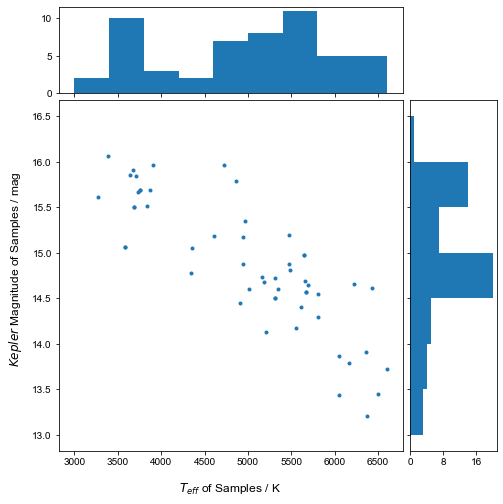

In [109]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# the random data
y = beb.Kepler_mag
x = beb.Teff


fig, axScatter = plt.subplots(figsize=(7, 7))

# the scatter plot:
axScatter.scatter(x, y,marker='.')
#axScatter.set_aspect(1.)

# create new axes on the right and on the top of the current axes
# The first argument of the new_vertical(new_horizontal) method is
# the height (width) of the axes to be created in inches.
divider = make_axes_locatable(axScatter)
axHistx = divider.append_axes("top", 1.2, pad=0.1, sharex=axScatter)
axHisty = divider.append_axes("right", 1.2, pad=0.1, sharey=axScatter)

# make some labels invisible
plt.setp(axHistx.get_xticklabels() + axHisty.get_yticklabels(),
         visible=False)

# now determine nice limits by hand:
#xymax = np.max([np.max(np.fabs(x)), np.max(np.fabs(y))])
#lim = (int(xymax/binwidth) + 1)*binwidth
ybins = np.arange(13,17,0.5)
xbins = np.arange(3000,7000,400)
#bins = np.arange(-lim, lim + binwidth, binwidth)
axHistx.hist(x, bins=xbins)
axHisty.hist(y, bins=ybins, orientation='horizontal')

# the xaxis of axHistx and yaxis of axHisty are shared with axScatter,
# thus there is no need to manually adjust the xlim and ylim of these
# axis.

#axHistx.axis["bottom"].major_ticklabels.set_visible(False)
for tl in axHistx.get_xticklabels():
    tl.set_visible(False)
axHistx.set_yticks([0, 5, 10])

#axHisty.axis["left"].major_ticklabels.set_visible(False)
for tl in axHisty.get_yticklabels():
    tl.set_visible(False)
axHisty.set_xticks([0, 8, 16])

axScatter.text(0.35, -0.12, '$T_{eff}$ of Samples / K', transform=axScatter.transAxes, 
            size=12)

axScatter.text(-0.15, 0.52, '$Kepler$ Magnitude of Samples / mag', transform=axScatter.transAxes, va='center', rotation='vertical',
            size=12)

plt.tight_layout()
plt.draw()
plt.show()

fig.savefig('beb_sample_teffkep.pdf',dpi=300,bbox_tight=True)

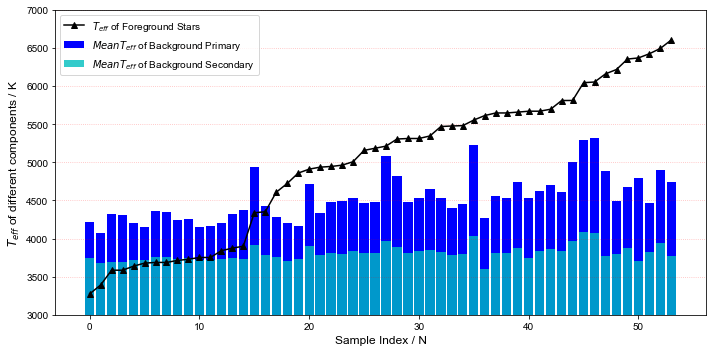

In [108]:
df = pd.DataFrame(np.zeros([len(beb),3]),columns=['Teff','Teff_A','Teff_B'])
df['Teff'] = beb.Teff
df['Teff_A'] = beb.Teff_A
df['Teff_B'] = beb.Teff_B
df.sort_values(['Teff'],inplace=True)

plt.figure(figsize=(10,5))


plt.bar(np.arange(len(df)),df.Teff_A, width=0.85, color='b', align="center",alpha=1,label='$Mean T_{eff}$ of Background Primary')
plt.bar(np.arange(len(df)),df.Teff_B, width=0.85, color='c', align="center",alpha=0.8,label='$Mean T_{eff}$ of Background Secondary')
plt.plot(np.arange(len(df)),df.Teff,marker='^', color='k',label='$T_{eff}$ of Foreground Stars',zorder=100)
plt.grid(True, axis="y", ls=":", color="r", alpha=0.3)
plt.xlabel('Sample Index / N',fontsize=12)
plt.ylabel('$T_{eff}$ of different components / K',fontsize=12)
plt.ylim([3000,7000])
plt.legend()
plt.tight_layout()
plt.savefig('beb_simulation_teff.pdf',dpi=300,bbox_tight=True)

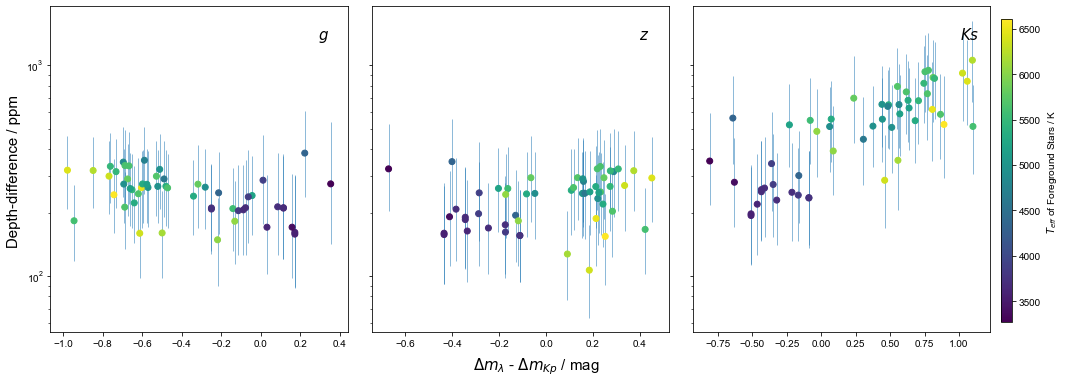

In [88]:

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(15,6), sharey=True)
band = ['g','z','K']
band_official = ['g','z','Ks']

scatter_kwargs = {"zorder":100}
error_kwargs = {"lw":.5, "zorder":0}

color = beb.Teff
m = abs(df_dmag['z-Kepler_med']) > 0.6


for ind,ax in enumerate(axes.flat):
    b = band[ind]
    qua = beb['beb_'+b+'_qua'].values
    med = beb['beb_'+b+'_med'].values
    tqua = beb['beb_'+b+'_tqua'].values
    x = df_dmag['{}-Kepler_med'.format(b)]
    y_err = np.array((med-qua,tqua-med))
    ax.errorbar(x=x,y=med,yerr=y_err,fmt='.',**error_kwargs)
    #ax.plot(ppm.Kp,ppm['5hr'],lw=1,linestyle='--')
    im = ax.scatter(x,med,c=color,marker='o',**scatter_kwargs)
    #ax.set_xscale('log')
    ax.set_yscale('log')

    ax.text(0.9, 0.9, '${}$'.format(band_official[ind]), transform=ax.transAxes, 
            size=15)
    
fig.subplots_adjust(left=0.05,right=0.92,wspace = 0.08)
cbar_ax = fig.add_axes([0.93, 0.15, 0.01, 0.70])
fig.colorbar(im, cax=cbar_ax,label='$T_{eff}$ of Foreground Stars / K')
fig.text(0.5, 0.04, '$\Delta m_{\lambda}$ - $\Delta m_{Kp}$ / mag', ha='center',fontsize=15)
fig.text(0.01, 0.5, 'Depth-difference / ppm', va='center', rotation='vertical',fontsize=15)
plt.savefig('beb_dmag_diff.pdf', bbox_inches='tight')

Text(0.01, 0.5, 'Depth-difference / ppm')

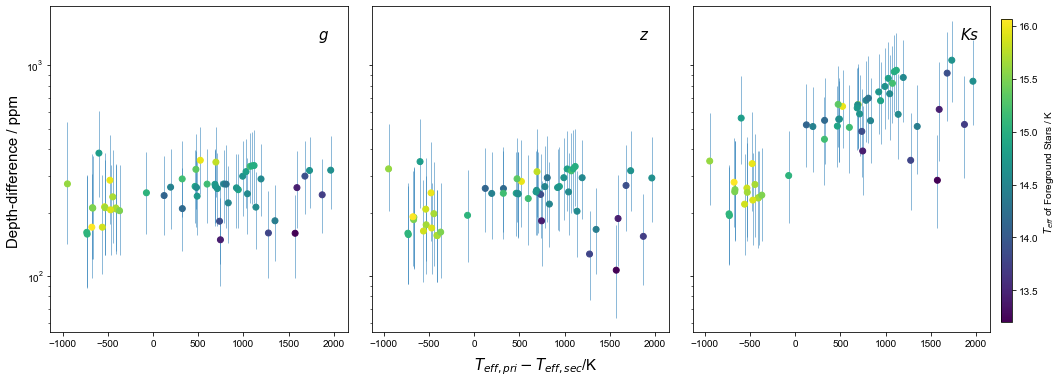

In [111]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(15,6), sharey=True)
band = ['g','z','K']
band_official = ['g','z','Ks']

scatter_kwargs = {"zorder":100}
error_kwargs = {"lw":.5, "zorder":0}

color = beb.Kepler_mag
x = beb.Teff-beb.Teff_A


for ind,ax in enumerate(axes.flat):
    b = band[ind]
    qua = beb['beb_'+b+'_qua'].values
    med = beb['beb_'+b+'_med'].values
    tqua = beb['beb_'+b+'_tqua'].values
    
    y_err = np.array((med-qua,tqua-med))
    ax.errorbar(x=x,y=med,yerr=y_err,fmt='.',**error_kwargs)
    #ax.plot(ppm.Kp,ppm['5hr'],lw=1,linestyle='--')
    im = ax.scatter(x,med,c=color,marker='o',**scatter_kwargs)
    #ax.set_xscale('log')
    ax.set_yscale('log')

    ax.text(0.9, 0.9, '${}$'.format(band_official[ind]), transform=ax.transAxes, 
            size=15)
    
fig.subplots_adjust(left=0.05,right=0.92,wspace = 0.08)
cbar_ax = fig.add_axes([0.93, 0.15, 0.01, 0.70])
fig.colorbar(im, cax=cbar_ax,label='$T_{eff}$ of Foreground Stars / K')
fig.text(0.5, 0.04, '$T_{eff,pri}-T_{eff,sec}$/K', ha='center',fontsize=15)
fig.text(0.01, 0.5, 'Depth-difference / ppm', va='center', rotation='vertical',fontsize=15)
#plt.savefig('beb_teff_diff.pdf', bbox_inches='tight')

In [44]:
from vespa.populations import BEBPopulation
band = ['g','r','i','z','J','H','K']
dmag = [b + '-Kepler_med' for b in band]
df_dmag = pd.DataFrame(np.zeros([len(beb),len(band)]),columns=dmag)
folder='/Users/neptune/Documents/Thesis/pipeline/data_beb_2/'
band = ['g','r','i','z','J','H','K']
for ind,koi in enumerate(beb.koi):
    print(ind)
    bebpop = BEBPopulation().load_hdf('/Users/neptune/Documents/Thesis/pipeline/data_beb_2/'+koi+'/beb_'+koi+'.h5')
    for b in band:
        dmag1 = bebpop.mags[b] - bebpop.stars[b+'_mag']
        dmag2 = bebpop.mags['Kepler'] - bebpop.stars['Kepler_mag']
        df_dmag.loc[ind,b+'-Kepler_med']=np.median(dmag1-dmag2)
    
    
    

0
1
2


/Users/neptune/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53


In [47]:
from vespa.populations import BEBPopulation
band = ['Kepler']
dmag = [b + 'dmag_med' for b in band]
kep_dmag = pd.DataFrame(np.zeros([len(beb),len(band)]),columns=dmag)
folder='/Users/neptune/Documents/Thesis/pipeline/data_beb_2/'
for ind,koi in enumerate(beb.koi):
    print(ind)
    bebpop = BEBPopulation().load_hdf('/Users/neptune/Documents/Thesis/pipeline/data_beb_2/'+koi+'/beb_'+koi+'.h5')
    for b in band:
        dmag1 = bebpop.mags[b] - bebpop.stars[b+'_mag']
        kep_dmag.loc[ind,b+'dmag_med']=np.median(dmag1)

0
1
2


/Users/neptune/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
